Text Summarization

In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

# Load pre-trained model and tokenizer
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

def summarize(text, model, tokenizer, max_length=130, min_length=30, do_sample=False):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=max_length, min_length=min_length, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example text
text = """
Hugging Face Inc. is a company that develops tools for building applications using machine learning. Its headquarters are in New York City.
It was founded in 2016 by Clement Delangue, Julien Chaumond, and Thomas Wolf. Initially, Hugging Face created a chatbot app targeted at teenagers.
In 2019, Hugging Face transformed into an open-source provider of NLP technologies.
Its model library, Transformers, became widely used in both academia and industry,
garnering significant attention for its implementation of state-of-the-art NLP models.
"""

# Perform summarization
summary = summarize(text, model, tokenizer)
print("Original text:\n", text)
print("\nSummary:\n", summary)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Original text:
 
Hugging Face Inc. is a company that develops tools for building applications using machine learning. Its headquarters are in New York City.
It was founded in 2016 by Clement Delangue, Julien Chaumond, and Thomas Wolf. Initially, Hugging Face created a chatbot app targeted at teenagers.
In 2019, Hugging Face transformed into an open-source provider of NLP technologies.
Its model library, Transformers, became widely used in both academia and industry,
garnering significant attention for its implementation of state-of-the-art NLP models.


Summary:
 Hugging Face was founded in 2016 by Clement Delangue, Julien Chaumond, and Thomas Wolf. In 2019, Hugging Face transformed into an open-source provider of NLP technologies. Its model library, Transformers, became widely used in both academia and industry.


Next Word Prediction

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model to evaluation mode
model.eval()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
import torch

def predict_next_word(prompt, model, tokenizer, top_k=5):
    # Tokenize input text
    inputs = tokenizer(prompt, return_tensors='pt')

    # Generate predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get logits of the last token in the sequence
    next_token_logits = outputs.logits[:, -1, :]

    # Filter the top k tokens by their probability
    top_k_tokens = torch.topk(next_token_logits, top_k).indices[0].tolist()

    # Decode the top k tokens to their corresponding words
    predicted_tokens = [tokenizer.decode([token]) for token in top_k_tokens]

    return predicted_tokens

# Example usage
prompt = "on a rainy day, I want to eat"
predicted_words = predict_next_word(prompt, model, tokenizer)
print(f"Prompt: {prompt}")
print(f"Next word predictions: {predicted_words}")


Prompt: on a rainy day, I want to eat
Next word predictions: [' a', ' something', ' some', ' my', '.']


Story Prediction

In [ ]:
def generate_text(prompt, model, tokenizer, max_length=50):
    generated = tokenizer.encode(prompt, return_tensors='pt')

    model.eval()
    with torch.no_grad():
        for _ in range(max_length):
            outputs = model(generated)
            next_token_logits = outputs.logits[:, -1, :]
            next_token = torch.argmax(next_token_logits, dim=-1)
            generated = torch.cat((generated, next_token.unsqueeze(0)), dim=1)
            if next_token == tokenizer.eos_token_id:
                break

    return tokenizer.decode(generated[0], skip_special_tokens=True)

# Example usage
prompt = "on a rainy day, I want to eat"
generated_text = generate_text(prompt, model, tokenizer)
print(f"Generated text: {generated_text}")


Generated text: on a rainy day, I want to eat a lot of vegetables. I want to eat a lot of vegetables. I want to eat a lot of vegetables. I want to eat a lot of vegetables. I want to eat a lot of vegetables. I want to eat a lot of vegetables.


Chatbot

In [ ]:


from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load pre-trained model and tokenizer with padding set to left
model_name = "microsoft/DialoGPT-medium"
tokenizer = AutoTokenizer.from_pretrained(model_name, padding_side='left')
model = AutoModelForCausalLM.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

def chat_with_model(prompt, chat_history_ids, model, tokenizer):
    # Encode the new user input, add the eos_token and return a tensor in PyTorch
    new_user_input_ids = tokenizer.encode(prompt + tokenizer.eos_token, return_tensors='pt')

    # Append the new user input tokens to the chat history
    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if chat_history_ids is not None else new_user_input_ids

    # Generate a response
    chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    # Decode the response and print it
    response = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)

    return response, chat_history_ids




tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/863M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/863M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
# Initialize chat history
chat_history_ids = None

print("Start chatting with the bot (type 'quit' to stop)")

while True:
    # Get user input
    user_input = input("You: ")

    # Exit condition
    if user_input.lower() == 'quit':
        break

    # Get the response from the model
    response, chat_history_ids = chat_with_model(user_input, chat_history_ids, model, tokenizer)

    print(f"Bot: {response}")

Start chatting with the bot (type 'quit' to stop)
You: hi


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Bot: Hey! :D
You: whatis chatbot
Bot: Chatbot is a chat program.
You: what is gpt
Bot: GPG is a protocol for sending encrypted data.
You: ok thanks
Bot: No problem. I'm glad you found it useful.


KeyboardInterrupt: Interrupted by user

Sentiment Analysis

In [ ]:


from transformers import pipeline

# Load pre-trained sentiment-analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis")

def analyze_sentiment(texts):
    results = sentiment_analysis(texts)
    for text, result in zip(texts, results):
        print(f"Text: {text}")
        print(f"Sentiment: {result['label']}, Score: {result['score']:.4f}")

# Example texts for sentiment analysis
example_texts = [
    "I love using Hugging Face's transformers library!",
    "The weather is gloomy and I feel sad.",
    "I'm so excited for the new movie release!",
    "I'm feeling quite neutral about this event."
]

# Perform sentiment analysis
for text in example_texts:
  analyze_sentiment(text)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Text: I
Sentiment: POSITIVE, Score: 0.9978
Text: T
Sentiment: NEGATIVE, Score: 0.9988
Text: I
Sentiment: POSITIVE, Score: 0.9997
Text: I
Sentiment: NEGATIVE, Score: 0.9989


Question Answering

In [ ]:


from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

# Load the pre-trained model and tokenizer
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

def answer_question(question, context):
    # Tokenize input question and context
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")

    # Get input ids and attention mask
    input_ids = inputs["input_ids"].tolist()[0]

    # Get the model's output
    outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    # Get the most likely beginning and end of answer with the argmax of the score
    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1

    # Convert tokens to the answer
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    return answer

# Define a context and a question
context = """
The Transformers library by Hugging Face provides general-purpose architectures for Natural Language Understanding (NLU) and Natural Language Generation (NLG) with pretrained models in over 100 languages.
These models can be used on a variety of tasks, including text classification, information extraction, question answering, summarization, translation, and text generation.
"""

question = "What does the Transformers library provide?"

# Get the answer
answer = answer_question(question, context)
print(f"Question: {question}")
print(f"Answer: {answer}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Question: What does the Transformers library provide?
Answer: general - purpose architectures for natural language understanding ( nlu ) and natural language generation ( nlg )


Image Generation

In [ ]:
# Install the necessary libraries
!pip install diffusers transformers torch

import torch
from diffusers import StableDiffusionPipeline

# Load the pre-trained Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

def generate_image(prompt, pipe):
    with torch.no_grad():
        image = pipe(prompt).images[0]
    return image

# Example text prompt
prompt = "A futuristic cityscape at sunset"

# Generate image
image = generate_image(prompt, pipe)

# Display the generated image
image.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

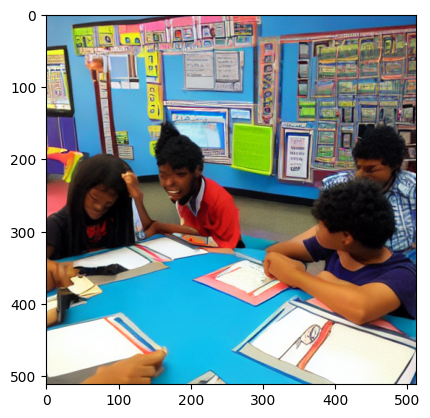

In [ ]:
# Example text prompt
prompt = "Teaching Transformers for students"

# Generate image
image = generate_image(prompt, pipe)

# Display the generated image
image.show()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(image)
plt.show()